# Finding Images with Dark Corner Artifacts (DCA's)

This notebook is used to find the dermascopic images which have black corners

The idea is to identify which images need modifying

---
## Standard Imports

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../Modules' not in sys.path:
    sys.path.insert(0, '../Modules')

import pandas as pd
import numpy as np
from PIL import Image
import os, os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import Bunch
import cv2 as cv
import image_modifications as im # custom image modification module
import isic_data as isic

---
## Load Dataset

In [2]:
X = isic.get_data(type = 'none')

lesions_train = X[0]
lesions_test = X[1]

---
## Total count of images and number of pixels

#### _Training Dataset_

In [3]:
training_dataset_size = lesions_train.images.shape[0]
training_dataset_size

7848

#### _Testing Dataset_

In [4]:
testing_dataset_size = lesions_test.images.shape[0]
testing_dataset_size

1962

#### _Total Dataset_

In [5]:
total_dataset_size = training_dataset_size + testing_dataset_size
total_dataset_size

9810

#### _Total count of pixels in an image_

In [6]:
total_pixels_in_image = lesions_train.images[0].shape[0] * lesions_train.images[0].shape[1]
total_pixels_in_image

50176

---
## Count number of dark pixels in an image

Find the number of pixels in an image with a value less than or equal to 1

This has been transformed into a callable function in the ```image_modifications.py``` module

```
plt.imshow(lesions_train.images[5], cmap = 'gray'); #208

lesions_train.images[5]
image = np.copy(lesions_train.images[5])

number_of_dark_pix = np.sum(image <= 1)
print(number_of_dark_pix)

mask = np.ones(image.shape)
mask[image <= 1] = 0
mask[image > 1] = 255

plt.imshow(mask, cmap='gray')

black_pixels = np.sum(mask == 0)
black_pixels

print(np.sum(mask==0))
```

---
## Count of images with DCA's

Below is the result of running the method on both the training and the testing datasets.

Assumptions are made on both individual datasets.

A total combined figure is recorded below the 2 tests and assumptions are made.

These tests are run on RGB images only, using greyscale images will require a different algorithm/alteration to the current one

#### _Training Dataset_

- Of the 7848 images in the training dataset, 1051 have flagged as having a DCA when using my algorithm
- Upon visual inspection it appears that 35/1000 (3.5%) of the images are anomalous and do not contain a DCA. This appears to be due to the darkness of the image and the overall image quality. These anomalies could potentially be reduced using further image processing
- Having a 3.5% failure rate suggests a 96.5% accuracy of the algorithm

In [7]:
total_dca_images_train = 0
img_positions = []
for i, image in enumerate(lesions_train.images):
    if im.has_dca(image, 10):
        total_dca_images_train += 1
        img_positions.append(i)

In [8]:
total_dca_images_train

1051

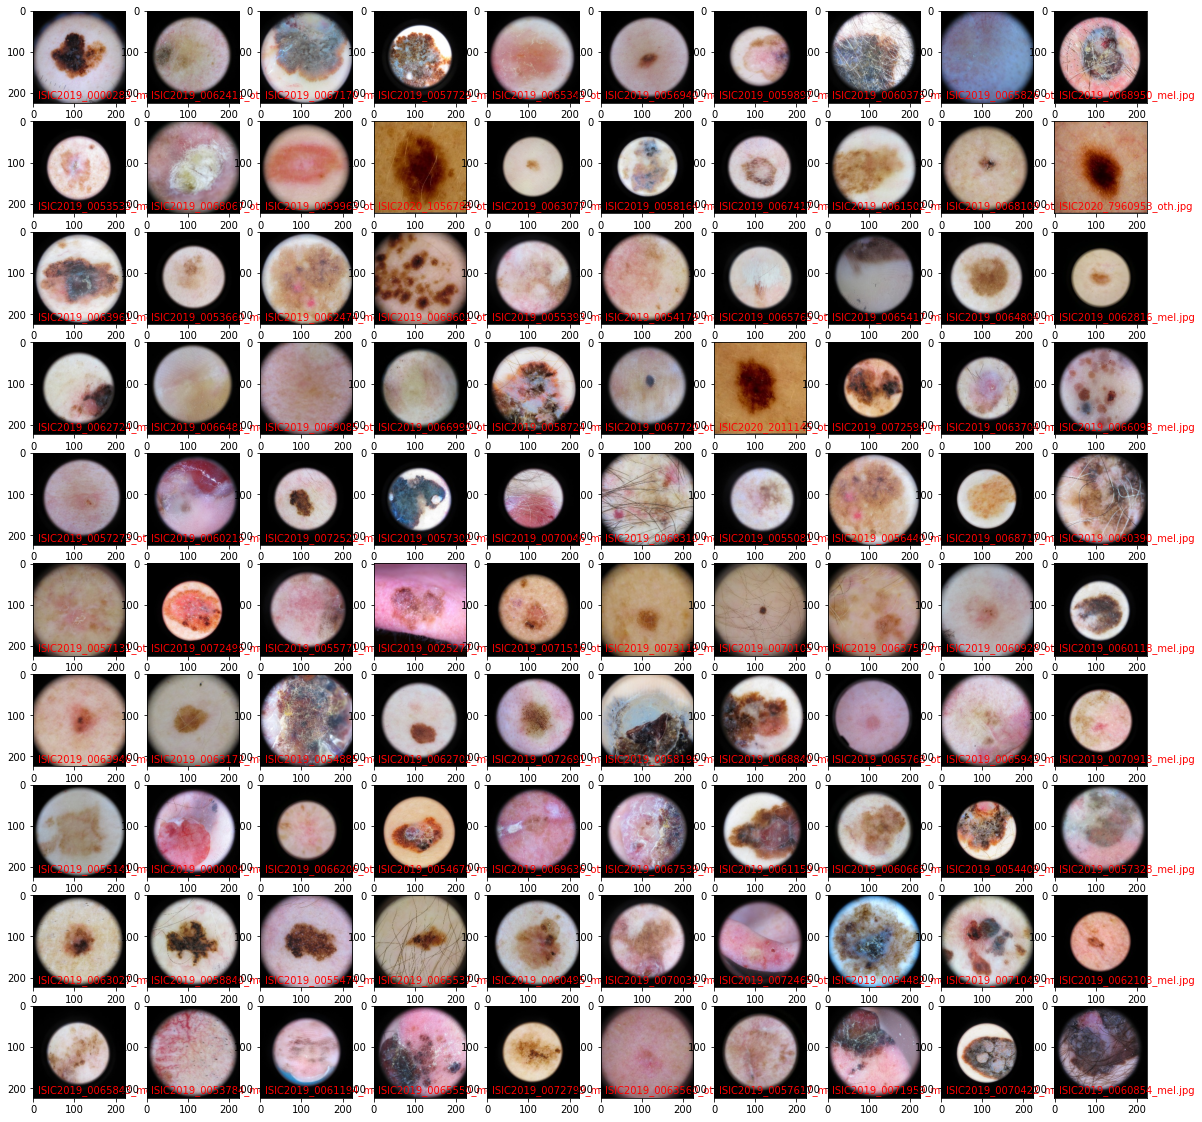

In [9]:
#fig, axes = plt.subplots(100,10, figsize=(20,200)) # uncomment this line to view 1000 images
fig, axes = plt.subplots(10,10, figsize=(20,20)) # uncomment this line to view 100 images

for i, ax in enumerate(axes.flat):
    ax.imshow(lesions_train.images[img_positions[i]], cmap='gray')
    ax.text(0.05, 0.05, lesions_train.filenames[img_positions[i]], transform=ax.transAxes, color='r')

#### _Testing Dataset_

- Of the 1962 images in the testing dataset, 241 have flagged as having a DCA using my algorithm
- Upon visual inspection it appears that 7/240 (2.92%) of the images are anomalous and do not contain a DCA.
- Having a 2.92% failure rate suggests 97.08% accuracy of the algorithm

In [10]:
total_dca_images_test = 0
img_positions_test = []
for i, image in enumerate(lesions_test.images):
    if im.has_dca(image, 10):
        total_dca_images_test += 1
        img_positions_test.append(i)
        
total_dca_images_test

241

In [11]:
lesions_test.images.shape[0]

1962

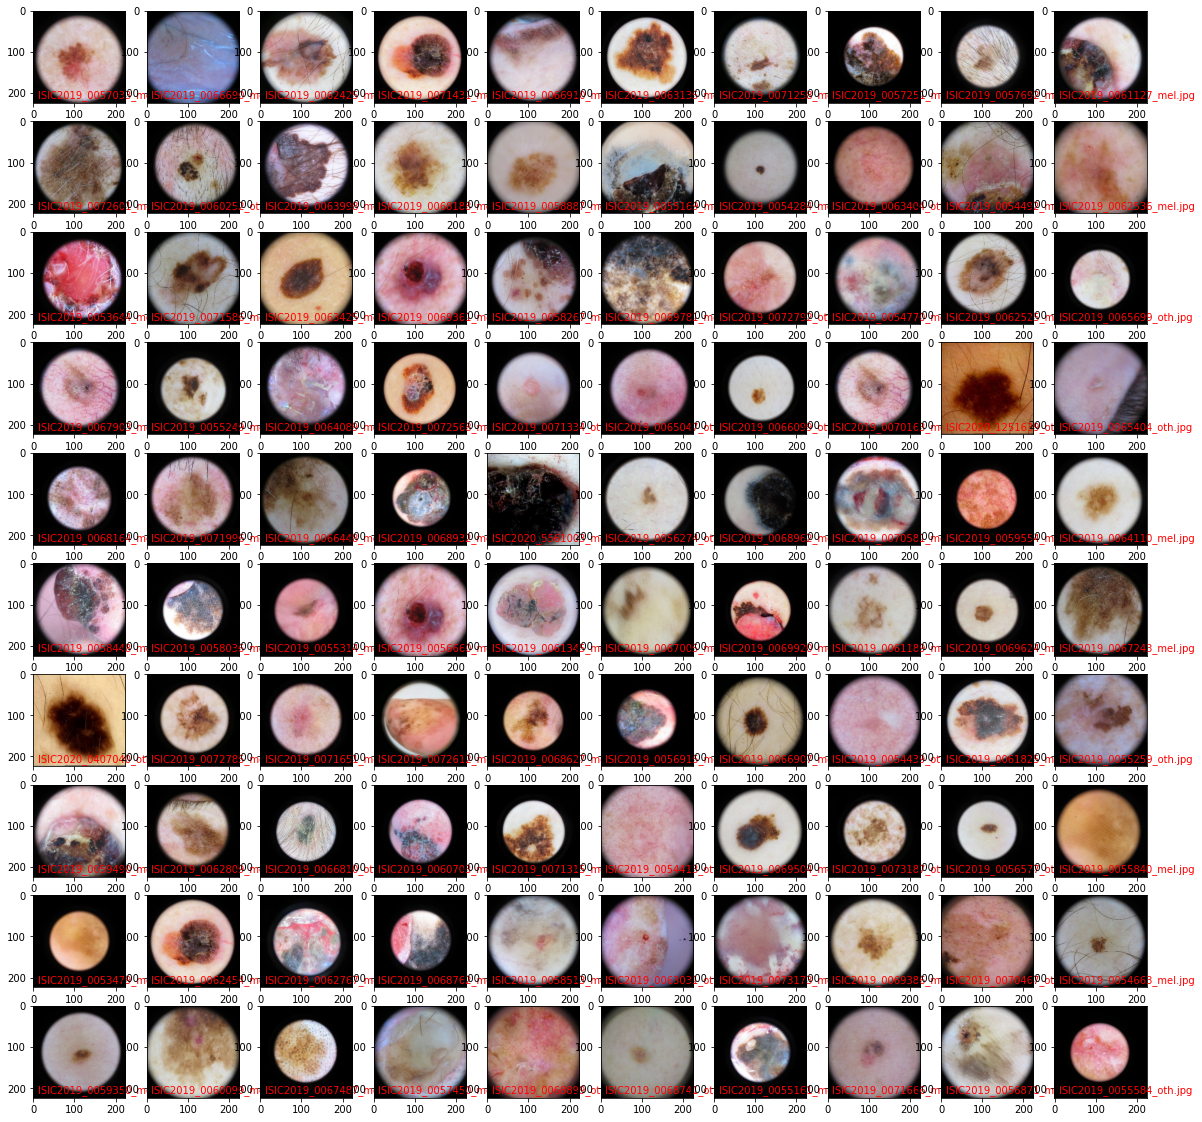

In [12]:
#fig, axes = plt.subplots(24,10, figsize=(20,40)) # uncomment this line to view 240 images
fig, axes = plt.subplots(10,10, figsize=(20,20)) # uncomment this line to view 100 images


for i, ax in enumerate(axes.flat):
    ax.imshow(lesions_test.images[img_positions_test[i]], cmap='gray')
    ax.text(0.05, 0.05, lesions_test.filenames[img_positions_test[i]], transform=ax.transAxes, color='r')

#### _Complete dataset_

- Out of the 9810 images in the entire dataset, 1292 flagged as having a DCA using my algorithm. 
- This means that 13.17% (12.78% if removing the anomalous 3%) of the entire dataset flagged as having this artifact.

In [13]:
total_dca_images = total_dca_images_train + total_dca_images_test
print("Total number of DCA images: ", str(total_dca_images))
print("Total % of dataset: ", str((total_dca_images / total_dataset_size) * 100))
print("Total number negating 3% failure rate: ", str((((total_dca_images/100)*97)/total_dataset_size)*100))

Total number of DCA images:  1292
Total % of dataset:  13.170234454638125
Total number negating 3% failure rate:  12.775127420998981
